<a href="https://colab.research.google.com/github/shubhamk16/Deep_learning/blob/master/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/TSAI_EVA_4.0/

/content/gdrive/My Drive/TSAI_EVA_4.0


In [0]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import albumentations

In [5]:
cd Transform_utils

/content/gdrive/My Drive/TSAI_EVA_4.0/Transform_utils


In [6]:
from transform_album  import Data
data = Data()
trainset = data.getTrainDataSet(train=True)
trainset1 = data.getTrainDataSet(train=True)
testset =  data.getTrainDataSet(train=False)
trainloader = data.getDataLoader(trainset, 128)
trainloader1 = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 128)
testloader1 = data.getDataLoader(testset, 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


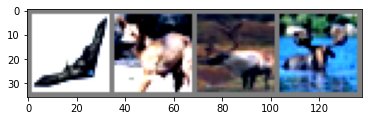

In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader1)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
from Model import resnet
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14           [-1

In [8]:
cd ..

/content/gdrive/My Drive/TSAI_EVA_4.0


In [10]:
from Model import resnet
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14           [-1

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [12]:
import torch
from tqdm import tqdm
import train
import test
test_acc = []
train_acc = []
for epoch in range(30):  # loop over the dataset multiple times
    if epoch>10:
      scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(train.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(test.test(net, device, testloader))
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.1


Epoch= 0 Loss=1.5946424007415771 Batch_id=390 Accuracy=47.50: 100%|██████████| 391/391 [01:11<00:00,  5.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 42 %
lr=  0.1


Epoch= 1 Loss=1.548677682876587 Batch_id=390 Accuracy=47.50: 100%|██████████| 391/391 [01:13<00:00,  5.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 54 %
lr=  0.1


Epoch= 2 Loss=0.9745847582817078 Batch_id=390 Accuracy=70.00: 100%|██████████| 391/391 [01:14<00:00,  5.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 65 %
lr=  0.1


Epoch= 3 Loss=0.949158787727356 Batch_id=390 Accuracy=73.75: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 68 %
lr=  0.1


Epoch= 4 Loss=0.6448529362678528 Batch_id=390 Accuracy=75.00: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72 %
lr=  0.1


Epoch= 5 Loss=0.6224638819694519 Batch_id=390 Accuracy=81.25: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 74 %
lr=  0.1


Epoch= 6 Loss=0.6346740126609802 Batch_id=390 Accuracy=86.25: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76 %
lr=  0.1


Epoch= 7 Loss=0.7736138105392456 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78 %
lr=  0.1


Epoch= 8 Loss=0.5484039187431335 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80 %
lr=  0.1


Epoch= 9 Loss=0.3854389488697052 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [01:14<00:00,  5.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81 %
lr=  0.1


Epoch= 10 Loss=0.35165685415267944 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82 %
lr=  0.1


Epoch= 11 Loss=0.39502641558647156 Batch_id=390 Accuracy=92.50: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82 %
lr=  0.1


Epoch= 12 Loss=0.3446327745914459 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [01:15<00:00,  5.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 13 Loss=0.3506656289100647 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:15<00:00,  5.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 14 Loss=0.1977187842130661 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 15 Loss=0.19439008831977844 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 16 Loss=0.27343136072158813 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 17 Loss=0.1704692244529724 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 18 Loss=0.20272016525268555 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.1


Epoch= 19 Loss=0.18406397104263306 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.05


Epoch= 20 Loss=0.05305973440408707 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87 %
lr=  0.05


Epoch= 21 Loss=0.08436528593301773 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87 %
lr=  0.05


Epoch= 22 Loss=0.029810119420289993 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87 %
lr=  0.05


Epoch= 23 Loss=0.0057933093048632145 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:14<00:00,  5.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 24 Loss=0.04178842157125473 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 25 Loss=0.004952228162437677 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 26 Loss=0.020451802760362625 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 27 Loss=0.03473781421780586 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 28 Loss=0.022977406159043312 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:14<00:00,  5.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 29 Loss=0.00681342463940382 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
100%|██████████| 79/79 [00:02<00:00, 27.76it/s]

Accuracy of the network on the 10000 test images: 86 %
Finished Training


Text(0, 0.5, 'Accuracy')

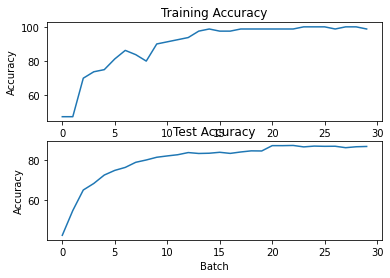

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc) 
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    dog horse   car  deer


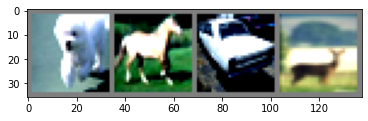

In [14]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
test.test_categorywise(net, device, testloader, classes)


100%|██████████| 79/79 [00:03<00:00, 26.00it/s]

Accuracy of plane : 83 %
Accuracy of   car : 100 %
Accuracy of  bird : 77 %
Accuracy of   cat : 73 %
Accuracy of  deer : 91 %
Accuracy of   dog : 77 %
Accuracy of  frog : 95 %
Accuracy of horse : 97 %
Accuracy of  ship : 87 %
Accuracy of truck : 87 %


In [20]:
testset =  data.getTrainDataSet(train=False)
testloader2 = data.getGradCamDataLoader(testset)
it = iter(testloader2)

Extracting ./data/cifar-10-python.tar.gz to ./data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck


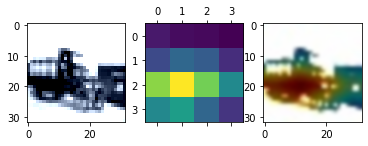

In [24]:
import gradcam
img,_ = next(it)
gradcam.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog


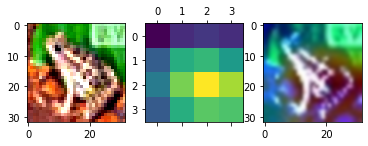

In [26]:
img,_ = next(it)
gradcam.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bird


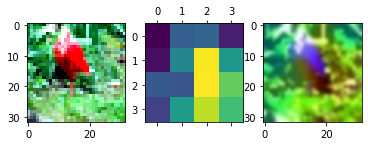

In [28]:
img,_ = next(it)
gradcam.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane


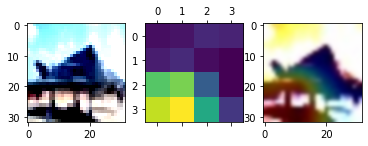

In [29]:
img,_ = next(it)
gradcam.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog


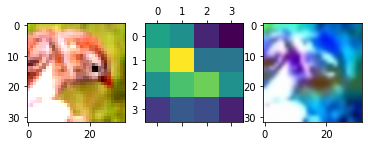

In [30]:
img,_ = next(it)
gradcam.gradcamof(net, img, classes)